# Sample notebook to create a model for predicting whether a post will reach the front page. Here, a simple 1-driver logistic regression is used as an example.

In [2]:
import sklearn as sk
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_validate
import pickle

## Load Reddit scrape data

In [3]:
filename = "Data/RedditScrapeDump.csv"
myDF = pd.read_csv(filename)
y = myDF['FP']
drivers = ['proj_rscore_prem_60']
X = myDF[drivers]
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state = 3, shuffle = True, stratify=y)

## Fit model to train set. Evaluate accuracy/precision metrics for train and test sets.

In [4]:
clf = LogisticRegression(penalty = 'none')
clf.fit(X_train,y_train)

print('Number of truths in test set:', np.sum(y_test))

yhat_train = clf.predict(X_train)
print('In-sample accuracy:',clf.score(X_train,y_train))
yhat_test = clf.predict(X_test)
print('Testing accuracy:',clf.score(X_test,y_test))
yhat = clf.predict(X)

#note we want precision to be high - the fraction of flagged positives that are ACTUALLY positive
precision_train = metrics.precision_score(y_train,yhat_train)
print('Training precision:',precision_train)
precision_test = metrics.precision_score(y_test,yhat_test)
print('Testing precision:',precision_test)


dummy_x = np.linspace(-4,1.5,100)
dummy_xdf = pd.DataFrame(dummy_x)
p_pred = clf.predict_proba(dummy_xdf)



Number of truths in test set: 6
In-sample accuracy: 0.956989247311828
Testing accuracy: 0.9714285714285714
Training precision: 0.8823529411764706
Testing precision: 0.8333333333333334


## Perform the logistic regression on the entire data set

In [7]:
#now perform regression on entire data set
clf = LogisticRegression(penalty = 'none')
clf.fit(X,y)

yhat = clf.predict(X)

#to get another estimate of precision, do cross validation on the entire data set and track the precision score
cv_results = cross_validate(clf, X, y=y, scoring='accuracy')
print('Average CV test accuracy',np.mean(cv_results['test_score']))
cv_results = cross_validate(clf, X, y=y, scoring='precision')
print('Average CV test precision',np.mean(cv_results['test_score']))

#Calculate decision threshold:
threshold = -clf.intercept_/clf.coef_
print("Decision threshold value for proj_rscore_prem_60 driver: %.3f" % threshold[0][0])

with open('logit_model.pickle', 'wb') as handle:
    pickle.dump(clf, handle)

Average CV test accuracy 0.9540372670807453
Average CV test precision 0.8666666666666668
Decision threshold value for proj_rscore_prem_60 driver: 0.327


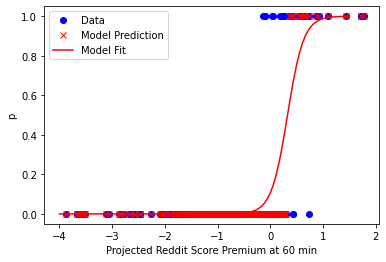

In [6]:
plt.plot(X,y,'bo',label = "Data")
plt.plot(X,yhat,'rx', label = "Model Prediction")
plt.plot(dummy_x,p_pred[:,1],'r', label = "Model Fit")
plt.ylabel("p")
plt.xlabel("Projected Reddit Score Premium at 60 min")
plt.legend()